In [660]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris(as_frame=True)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

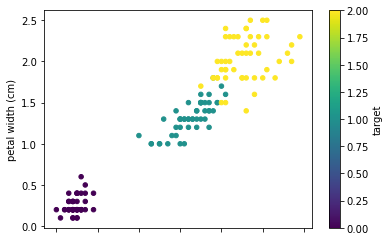

In [661]:
pd.concat([iris.data, iris.target], axis=1).plot.scatter(
x='petal length (cm)',
y='petal width (cm)',
c='target',
colormap='viridis'
)

In [662]:
X = iris.data[['petal length (cm)', 'petal width (cm)']]

In [663]:
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [664]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

acc_list = []
weights_list = []

for i in range(3):
    y = (iris.target == i).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
    y_pred_train = perceptron.predict(X_train)
    y_pred_test = perceptron.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    acc = (train_acc, test_acc)
    weight = (perceptron.intercept_[0], perceptron.coef_[0][0], perceptron.coef_[0][1])
    acc_list.append(acc)
    weights_list.append(weight)

In [665]:
acc_list

[(1.0, 1.0),
 (0.7833333333333333, 0.8),
 (0.7166666666666667, 0.7333333333333333)]

In [666]:
weights_list

[(4.0, -0.9999999999999996, -2.9999999999999996),
 (-7.0, 5.800000000000007, -12.399999999999995),
 (-30.0, 2.59999999999999, 19.300000000000004)]

In [667]:
import pickle
open_file = open("per_acc.pkl", "wb")
pickle.dump(acc_list, open_file)
open_file.close()

In [668]:
open_file = open("per_acc.pkl", "rb")
loaded_list = pickle.load(open_file)
open_file.close()

print(loaded_list)

[(1.0, 1.0), (0.7833333333333333, 0.8), (0.7166666666666667, 0.7333333333333333)]


In [669]:
open_file = open("per_wght.pkl", "wb")
pickle.dump(weights_list, open_file)
open_file.close()

In [670]:
open_file = open("per_wght.pkl", "rb")
loaded_list = pickle.load(open_file)
open_file.close()

print(loaded_list)

[(4.0, -0.9999999999999996, -2.9999999999999996), (-7.0, 5.800000000000007, -12.399999999999995), (-30.0, 2.59999999999999, 19.300000000000004)]


In [671]:
X = np.array([[0, 0],
[0, 1],
[1, 0],
[1, 1]])
y = np.array([0,
1,
1,
0])

In [672]:
perceptron = Perceptron()
perceptron.fit(X,y)

Perceptron()

In [673]:
perceptron.predict(X)

array([0, 0, 0, 0])

In [674]:
perceptron.intercept_

array([0.])

In [675]:
perceptron.coef_

array([[0., 0.]])

In [676]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [677]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [678]:
history = model.fit(X, y, epochs=100, verbose=False)
print(history.history['loss'])

[0.7200224995613098, 0.7194325923919678, 0.718960165977478, 0.7186121344566345, 0.7182677984237671, 0.717927098274231, 0.7175900340080261, 0.7172565460205078, 0.7169265151023865, 0.7165999412536621, 0.7162768840789795, 0.7159570455551147, 0.715640664100647, 0.7153274416923523, 0.7150174379348755, 0.7147107720375061, 0.7144070863723755, 0.7141066789627075, 0.7138091325759888, 0.7135147452354431, 0.7132232189178467, 0.7129347324371338, 0.7126491069793701, 0.7123663425445557, 0.7120863795280457, 0.7118092179298401, 0.7115347385406494, 0.7112630605697632, 0.7109940648078918, 0.7107276916503906, 0.71046382188797, 0.7102025747299194, 0.7099438905715942, 0.7096877098083496, 0.7094339728355408, 0.7091826796531677, 0.7089337110519409, 0.7086872458457947, 0.7084430456161499, 0.7082011699676514, 0.7079615592956543, 0.7077242136001587, 0.707489013671875, 0.7072560787200928, 0.7070253491401672, 0.7067967057228088, 0.7065701484680176, 0.7063456773757935, 0.7061233520507812, 0.7059029340744019, 0.705

In [679]:
model.summary()

Model: "sequential_824"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1664 (Dense)           (None, 2)                 6         
_________________________________________________________________
dense_1665 (Dense)           (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [680]:
model.predict(X)

array([[0.51702094],
       [0.48592463],
       [0.4206018 ],
       [0.37610653]], dtype=float32)

In [686]:
import time
start_time = time.time()
while True:
    model = tf.keras.Sequential()
    adam = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=adam, loss='mae', metrics=["accuracy"])
    history = model.fit(X, y, epochs=100, verbose=False)
    prediction = model.predict(X)
    if prediction[0][0] < 0.1 and prediction[3][0] < 0.1 and prediction[1][0] > 0.9 and prediction[2][0] > 0.9:
        break
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.009238719940186 seconds ---


In [682]:
print(model.predict(X))

[[0.00322646]
 [0.9817691 ]
 [0.9985297 ]
 [0.00378338]]


In [683]:
model.get_weights()

[array([[ 4.366791 ,  2.36186  ],
        [-4.295105 , -2.3608797]], dtype=float32),
 array([-0.03943987,  2.3584697 ], dtype=float32),
 array([[ 5.08099  ],
        [-4.1210494]], dtype=float32),
 array([3.9862373], dtype=float32)]

In [684]:
open_file = open("mlp_xor_weights.pkl", "wb")
pickle.dump(model.get_weights(), open_file)
open_file.close()

In [685]:
open_file = open("mlp_xor_weights.pkl", "rb")
loaded_list = pickle.load(open_file)
open_file.close()

print(loaded_list)

[array([[ 4.366791 ,  2.36186  ],
       [-4.295105 , -2.3608797]], dtype=float32), array([-0.03943987,  2.3584697 ], dtype=float32), array([[ 5.08099  ],
       [-4.1210494]], dtype=float32), array([3.9862373], dtype=float32)]
